In [17]:
import pandas as pd

df = pd.read_excel("C://Users/Usuario/Documents/UERJ/2020.2/IPG/Teste Temperamentos/Analise Resultados.xlsx")
#df = df.drop(["Unnamed: 0"], axis=1)
display(df)
print(df.info())

,ID,Sexo,Idade,Curso,Áreas,Quanto você se considera uma pessoa criativa?,Temperamento,% E,% I,% S,% N,% T,% F,% J,% P,DAT
0,1,Masculino,53,-,Humanas,6,INTJ,0.2,0.8,0.50,0.50,0.85,0.15,0.60,0.40,77.59
1,2,Feminino,25,Engenharia de Produção,Exatas,7,INTP,0.5,0.5,0.50,0.50,0.90,0.10,0.25,0.75,85.46
2,3,Feminino,24,Engenharia de Produção,Exatas,7,ENFP,0.9,0.1,0.45,0.55,0.15,0.85,0.45,0.55,81.68
3,4,Masculino,26,Direito,Humanas,9,ESTJ,0.8,0.2,0.70,0.30,0.55,0.45,0.80,0.20,72.39
4,5,Feminino,23,Administração,Humanas,5,ESTJ,0.7,0.3,0.55,0.45,0.70,0.30,0.70,0.30,79.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,Feminino,25,Arquitetura e Urbanismo,Humanas,8,INFP,0.5,0.5,0.45,0.55,0.25,0.75,0.50,0.50,79.54
76,77,Feminino,25,Psicologia,Humanas,8,ESTP,0.7,0.3,0.60,0.40,0.80,0.20,0.50,0.50,66.90
77,78,Feminino,24,Engenharia de Produção,Exatas,5,ENFJ,0.6,0.4,0.50,0.50,0.10,0.90,0.55,0.45,73.59
78,79,Masculino,25,Engenharia Civil,Exatas,8,ENTP,0.7,0.3,0.45,0.55,0.40,0.60,0.30,0.70,77.68


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   ID                                             80 non-null     int64  
 1   Sexo                                           80 non-null     object 
 2   Idade                                          80 non-null     int64  
 3   Curso                                          80 non-null     object 
 4   Áreas                                          80 non-null     object 
 5   Quanto você se considera uma pessoa criativa?  80 non-null     int64  
 6   Temperamento                                   80 non-null     object 
 7   % E                                            80 non-null     float64
 8   % I                                            80 non-null     float64
 9   % S                                            80 non-nu

In [18]:
# transformar coluna que deveria ser número e está como texto em número
df["DAT"] = pd.to_numeric(df["DAT"], errors="coerce")

# remover a coluna que está 100% vazia
#df = df.dropna(how='all', axis=1)

# remover colunas que não serão necessárias
#df.drop(columns = df.columns[[0,1,2,3,17,18,19,20,21,22]], inplace = True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   ID                                             80 non-null     int64  
 1   Sexo                                           80 non-null     object 
 2   Idade                                          80 non-null     int64  
 3   Curso                                          80 non-null     object 
 4   Áreas                                          80 non-null     object 
 5   Quanto você se considera uma pessoa criativa?  80 non-null     int64  
 6   Temperamento                                   80 non-null     object 
 7   % E                                            80 non-null     float64
 8   % I                                            80 non-null     float64
 9   % S                                            80 non-nu

In [19]:
display(df["Temperamento"].value_counts())
display(df["Temperamento"].value_counts(normalize=True).map('{:.1%}'.format))

ISTJ    12
ESTJ    10
INFJ     9
INTJ     8
ENFP     7
ISFP     6
ENFJ     5
ISFJ     4
ESFJ     4
ESFP     4
INFP     3
ENTP     3
ENTJ     2
ESTP     2
INTP     1
Name: Temperamento, dtype: int64

ISTJ    15.0%
ESTJ    12.5%
INFJ    11.2%
INTJ    10.0%
ENFP     8.8%
ISFP     7.5%
ENFJ     6.2%
ISFJ     5.0%
ESFJ     5.0%
ESFP     5.0%
INFP     3.8%
ENTP     3.8%
ENTJ     2.5%
ESTP     2.5%
INTP     1.2%
Name: Temperamento, dtype: object

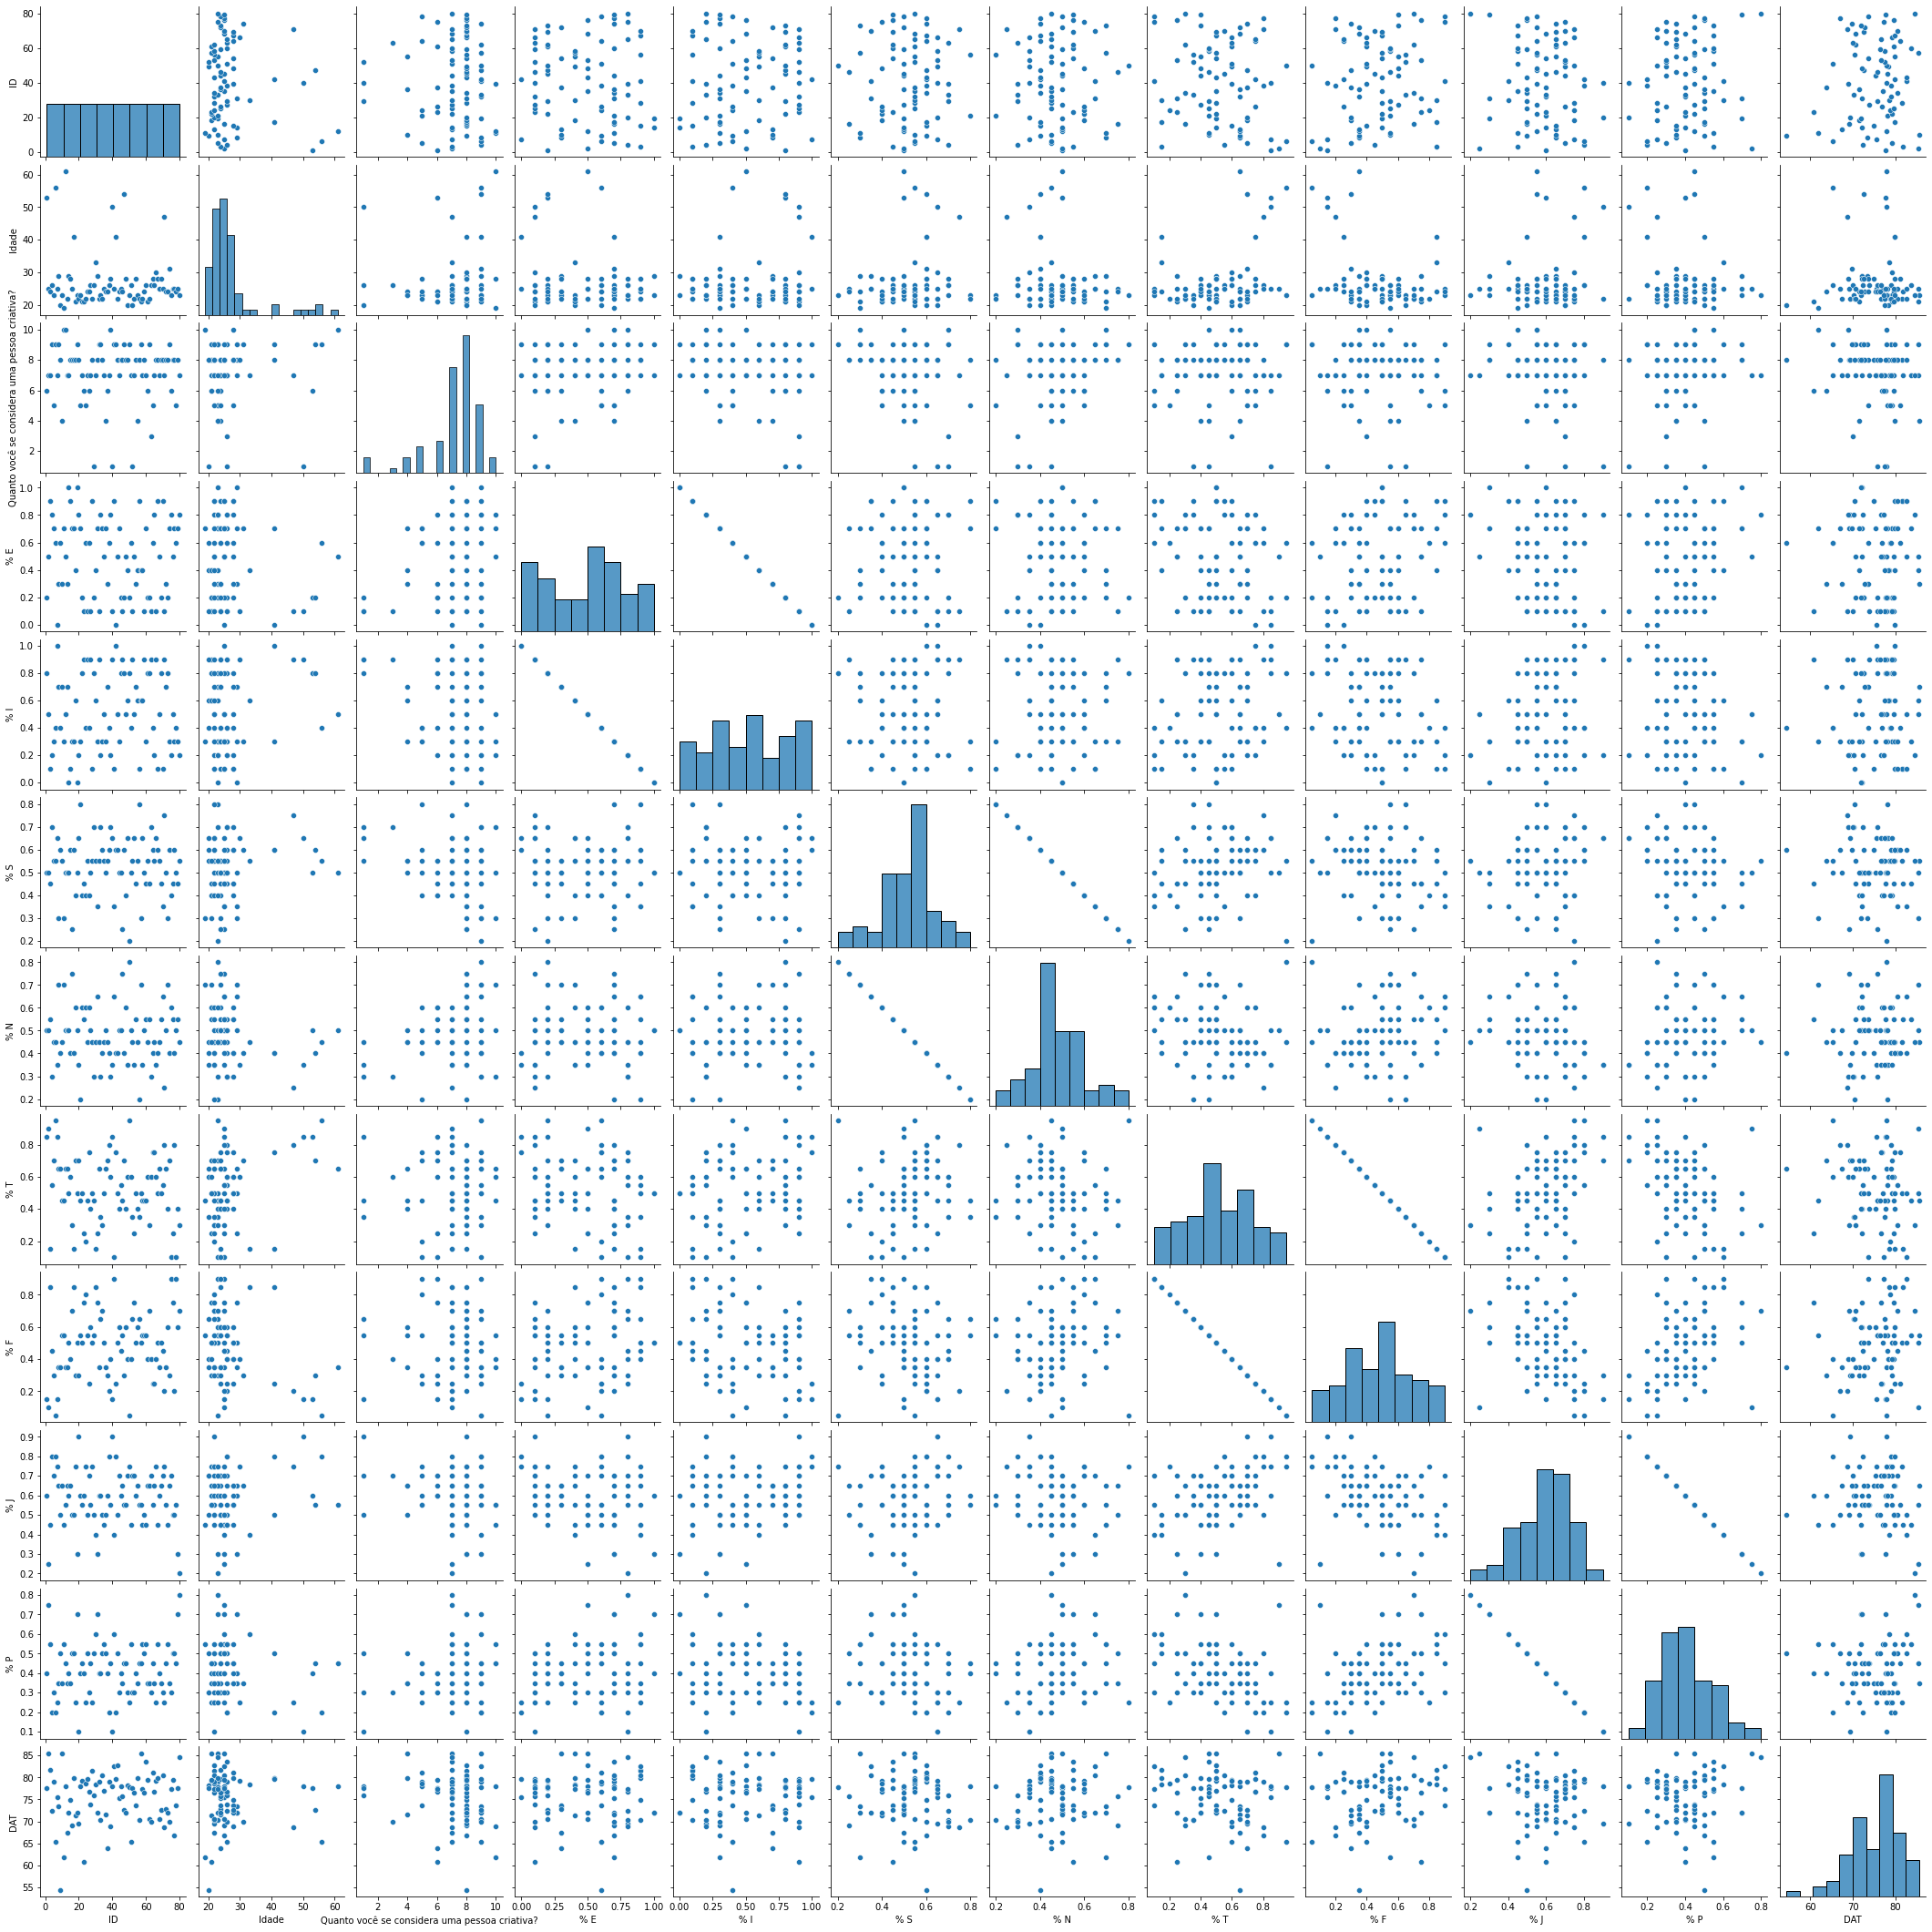

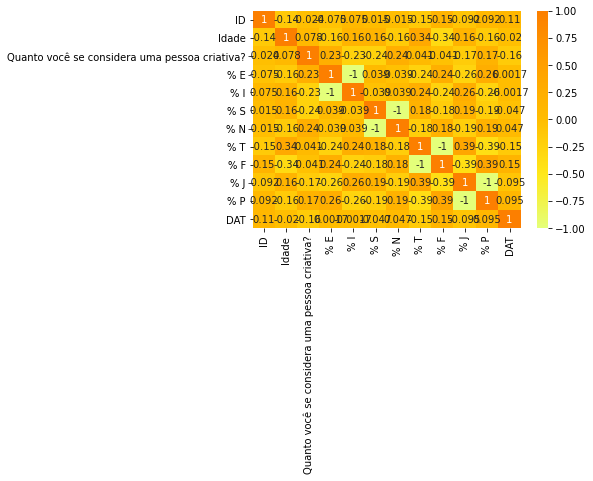

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()
sns.heatmap(df.corr(), cmap ='Wistia', annot =True)
plt.show()

In [22]:
import plotly.express as px

# para edições nos gráficos: https://plotly.com/python/histograms/

for coluna in df:
    if coluna != "ID":
        # criar a figura
        fig = px.histogram(df, x=coluna, color="Temperamento")
        # exibir a figura
        fig.show()
        display(df.pivot_table(index="Temperamento", columns=coluna, aggfunc='count')["ID"])

Sexo,Feminino,Masculino
Temperamento,,
ENFJ,4.0,1.0
ENFP,3.0,4.0
ENTJ,2.0,NaN
ENTP,1.0,2.0
ESFJ,4.0,NaN
ESFP,2.0,2.0
ESTJ,4.0,6.0
ESTP,1.0,1.0
INFJ,6.0,3.0


Idade,19,20,21,22,23,24,25,26,28,29,30,31,33,41,47,50,53,54,56,61
Temperamento,,,,,,,,,,,,,,,,,,,,
ENFJ,NaN,NaN,NaN,1.0,1.0,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENFP,1.0,NaN,NaN,NaN,1.0,1.0,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENTJ,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENTP,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESFJ,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESFP,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
ESTJ,NaN,NaN,NaN,1.0,1.0,NaN,NaN,3.0,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
ESTP,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INFJ,NaN,NaN,3.0,1.0,NaN,1.0,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Curso,-,Administração,Análise e Desenvolvimento de Sistemas,Arquitetura e Urbanismo,Biomed,Ciência da Computação,Ciências Contábeis,Ciências militares,Design,Design Gráfico,...,Letras,Letras inglês,Medicina Veterinária,Nenhum,Nutrição,Pedagogia,Psicologia,RI,Sciences de la Vie et de la Terre,nenhum
Temperamento,,,,,,,,,,,,,,,,,,,,,
ENFJ,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
ENFP,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENTJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENTP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESFJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESFP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
ESTJ,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
INFJ,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Áreas,Biológicas,Exatas,Humanas
Temperamento,,,
ENFJ,NaN,2.0,3.0
ENFP,NaN,6.0,1.0
ENTJ,NaN,1.0,1.0
ENTP,NaN,2.0,1.0
ESFJ,NaN,3.0,1.0
ESFP,1.0,2.0,1.0
ESTJ,NaN,6.0,4.0
ESTP,NaN,1.0,1.0
INFJ,1.0,6.0,2.0


Quanto você se considera uma pessoa criativa?,1,3,4,5,6,7,8,9,10
Temperamento,,,,,,,,,
ENFJ,NaN,NaN,NaN,2.0,1.0,2.0,NaN,NaN,NaN
ENFP,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0
ENTJ,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
ENTP,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN
ESFJ,NaN,NaN,NaN,1.0,NaN,NaN,2.0,1.0,NaN
ESFP,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN
ESTJ,NaN,NaN,NaN,2.0,NaN,2.0,2.0,3.0,1.0
ESTP,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
INFJ,NaN,NaN,NaN,NaN,1.0,2.0,4.0,2.0,NaN


Temperamento,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ
Temperamento,,,,,,,,,,,,,,,
ENFJ,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENFP,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENTJ,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENTP,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESFJ,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESFP,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTJ,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INFJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN


% E,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
Temperamento,,,,,,,,,,,
ENFJ,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,1.0
ENFP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,2.0,1.0
ENTJ,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
ENTP,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN
ESFJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,NaN
ESFP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN
ESTJ,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,4.0,1.0,NaN
ESTP,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
INFJ,NaN,3.0,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN


% I,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
Temperamento,,,,,,,,,,,
ENFJ,1.0,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
ENFP,1.0,2.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENTJ,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
ENTP,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
ESFJ,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESFP,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTJ,NaN,1.0,4.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
ESTP,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
INFJ,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,3.0,3.0,NaN


% S,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80
Temperamento,,,,,,,,,,,,,
ENFJ,NaN,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
ENFP,NaN,1.0,1.0,2.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
ENTJ,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENTP,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
ESFJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,2.0
ESFP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN
ESTJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,1.0,2.0,NaN,NaN
ESTP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
INFJ,NaN,1.0,1.0,NaN,2.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


% N,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80
Temperamento,,,,,,,,,,,,,
ENFJ,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN
ENFP,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,2.0,1.0,1.0,NaN
ENTJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
ENTP,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN
ESFJ,2.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESFP,NaN,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTJ,NaN,NaN,2.0,1.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTP,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INFJ,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,2.0,NaN,1.0,1.0,NaN


% T,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
Temperamento,,,,,,,,,,,,,,,,,,
ENFJ,2.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENFP,1.0,1.0,NaN,1.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENTJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
ENTP,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
ESFJ,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESFP,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,3.0,2.0,1.0,NaN,NaN,1.0
ESTP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
INFJ,NaN,NaN,NaN,1.0,1.0,NaN,2.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


% F,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90
Temperamento,,,,,,,,,,,,,,,,,,
ENFJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,2.0
ENFP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,1.0,NaN,1.0,1.0
ENTJ,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENTP,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
ESFJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
ESFP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN
ESTJ,1.0,NaN,NaN,1.0,2.0,3.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTP,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INFJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN


% J,0.20,0.25,0.30,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.90
Temperamento,,,,,,,,,,,,,
ENFJ,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,2.0,1.0,NaN,NaN
ENFP,NaN,NaN,2.0,1.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENTJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
ENTP,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESFJ,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN
ESFP,1.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTJ,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,1.0,NaN,3.0,1.0
ESTP,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INFJ,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,NaN,NaN,NaN,NaN


% P,0.10,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.70,0.75,0.80
Temperamento,,,,,,,,,,,,,
ENFJ,NaN,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
ENFP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,1.0,2.0,NaN,NaN
ENTJ,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENTP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN
ESFJ,NaN,NaN,1.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
ESFP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,1.0
ESTJ,1.0,3.0,NaN,1.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
ESTP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
INFJ,NaN,NaN,NaN,NaN,3.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


DAT,54.42,60.77,61.82,63.84,65.30,65.31,66.90,67.49,68.68,68.97,...,81.08,81.44,81.68,82.49,82.67,83.63,84.59,85.37,85.46,85.53
Temperamento,,,,,,,,,,,,,,,,,,,,,
ENFJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENFP,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN
ENTJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENTP,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESFJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESFP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
ESTJ,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTP,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INFJ,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
